In [2]:
import cv2
import numpy as np

## convertMaps()

Converts image transformation maps from one representation to another.  
  
The function converts a pair of maps for remap from one representation to another. The following options ( (map1.type(), map2.type()) → (dstmap1.type(), dstmap2.type()) ) are supported:  
  
(𝙲𝚅_𝟹𝟸𝙵𝙲𝟷, 𝙲𝚅_𝟹𝟸𝙵𝙲𝟷)→(𝙲𝚅_𝟷𝟼𝚂𝙲𝟸, 𝙲𝚅_𝟷𝟼𝚄𝙲𝟷). This is the most frequently used conversion operation, in which the original floating-point maps (see remap ) are converted to a more compact and much faster fixed-point representation. The first output array contains the rounded coordinates and the second array (created only when nninterpolation=false ) contains indices in the interpolation tables.  
(𝙲𝚅_𝟹𝟸𝙵𝙲𝟸)→(𝙲𝚅_𝟷𝟼𝚂𝙲𝟸, 𝙲𝚅_𝟷𝟼𝚄𝙲𝟷). The same as above but the original maps are stored in one 2-channel matrix.  
Reverse conversion. Obviously, the reconstructed floating-point maps will not be exactly the same as the originals.  

Parameters  
- map1	The first input map of type CV_16SC2, CV_32FC1, or CV_32FC2 .
- map2	The second input map of type CV_16UC1, CV_32FC1, or none (empty matrix), respectively.
- dstmap1	The first output map that has the type dstmap1type and the same size as src .
- dstmap2	The second output map.
- dstmap1type	Type of the first output map that should be CV_16SC2, CV_32FC1, or CV_32FC2 .
- nninterpolation	Flag indicating whether the fixed-point maps are used for the nearest-neighbor or for a more complex interpolation.

  
dstmap1, dstmap2	=	cv.convertMaps(	map1, map2, dstmap1type[, dstmap1[, dstmap2[, nninterpolation]]]	)


## getAffineTransform()

In [8]:
import cv2
import numpy as np

In [15]:
dstmap1,dstma2 = cv2.convertMaps(([1,0,50]),([0,1,50]),cv2.CV_16SC2)

TypeError: Expected Ptr<cv::UMat> for argument '%s'

## getPerspectiveTransform() 

## getRectSubPix()

## getRotationMatrix2D() 图像旋转

Calculates an affine matrix of 2D rotation.  
  
The function calculates the following matrix:  

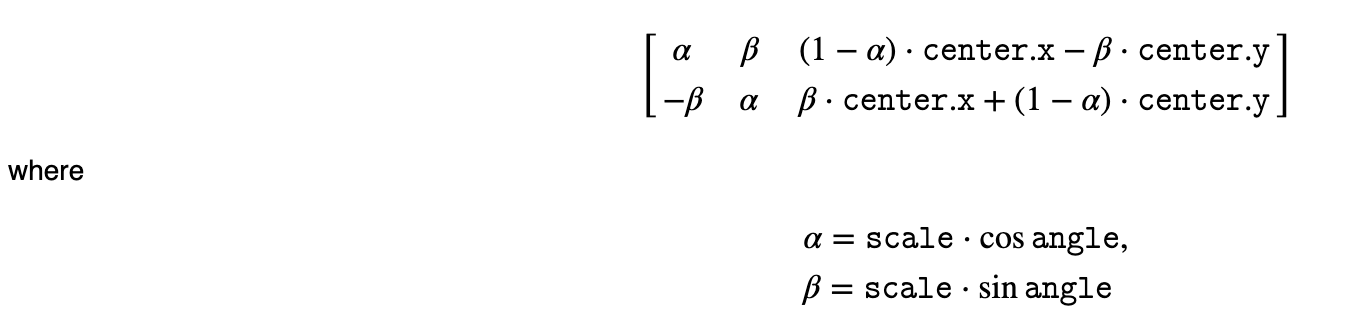

The transformation maps the rotation center to itself. If this is not the target, adjust the shift.  
  
Parameters  
- center	Center of the rotation in the source image.
- angle	Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
- scale	Isotropic scale factor.

  
retval	=	cv.getRotationMatrix2D(	center, angle, scale	)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("boxfilter.jpg")

In [3]:
rows, cols, ch = img.shape
print("rows:",rows,"clos:",cols)

rows: 388 clos: 291


In [4]:
matrix_r = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)

In [5]:
matrix_r

array([[ 6.123234e-17,  1.000000e+00, -4.850000e+01],
       [-1.000000e+00,  6.123234e-17,  3.395000e+02]])

In [6]:
rotated_img = cv2.warpAffine(img, matrix_r, (rows,cols))

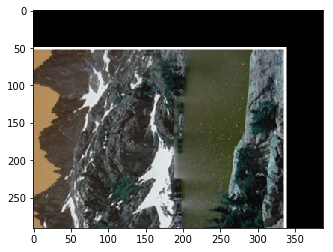

In [7]:
plt.imshow(rotated_img)

## invertAffineTransform()

## linearPolar()

## logPolar()

## remap()

## resize() 缩放大小

Resizes an image.  
  
The function resize resizes the image src down to or up to the specified size. Note that the initial dst type or size are not taken into account. Instead, the size and type are derived from the src,dsize,fx, and fy. If you want to resize src so that it fits the pre-created dst, you may call the function as follows:  
  
// explicitly specify dsize=dst.size(); fx and fy will be computed from that.  
resize(src, dst, dst.size(), 0, 0, interpolation);
If you want to decimate the image by factor of 2 in each direction, you can call the function this way:  

// specify fx and fy and let the function compute the destination image size.  
resize(src, dst, Size(), 0.5, 0.5, interpolation);  
To shrink an image, it will generally look best with INTER_AREA interpolation, whereas to enlarge an image, it will generally look best with c::INTER_CUBIC (slow) or INTER_LINEAR (faster but still looks OK).  

Parameters  
- src	input image.
- dst	output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.
- dsize	output image size; if it equals zero, it is computed as:  
  𝚍𝚜𝚒𝚣𝚎 = 𝚂𝚒𝚣𝚎(𝚛𝚘𝚞𝚗𝚍(𝚏𝚡*𝚜𝚛𝚌.𝚌𝚘𝚕𝚜), 𝚛𝚘𝚞𝚗𝚍(𝚏𝚢*𝚜𝚛𝚌.𝚛𝚘𝚠𝚜))
- Either dsize or both fx and fy must be non-zero.
- fx	scale factor along the horizontal axis; when it equals 0, it is computed as  
  (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜
- fy	scale factor along the vertical axis; when it equals 0, it is computed as
  (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜  


dst	=	cv.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]]	)


In [37]:
import cv2
import matplotlib.pyplot as plt

In [38]:
img = cv2.imread("bilateral.png")

In [40]:
img.shape

(324, 434, 3)

In [39]:
resize_img = cv2.resize(img, None, fx=1/2,fy=1/2)

In [42]:
resize_img.shape

(162, 217, 3)

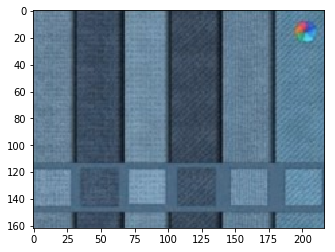

In [41]:
plt.imshow(resize_img)

---

## warpAffine()

Applies an affine transformation to an image.

The function warpAffine transforms the source image using the specified matrix:

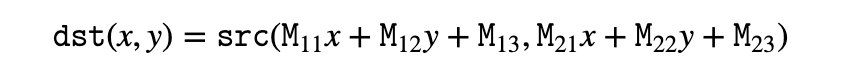

when the flag WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted with invertAffineTransform and then put in the formula above instead of M. The function cannot operate in-place.

Parameters
- src	input image.
- dst	output image that has the size dsize and the same type as src .
- M	2×3 transformation matrix.
- dsize	size of the output image.
- flags	combination of interpolation methods (see InterpolationFlags) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( 𝚍𝚜𝚝→𝚜𝚛𝚌 ).
- borderMode	pixel extrapolation method (see BorderTypes); when borderMode=BORDER_TRANSPARENT, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.
- borderValue	value used in case of a constant border; by default, it is 0.  

  
dst	=	cv.warpAffine(	src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]	)


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
img = cv2.imread("bilateral.png")
rows, cols, ch = img.shape

In [23]:
print("|rows:",rows,"|cols:",cols,"|ch:",ch,"|")

|rows: 324 |cols: 434 |ch: 3 |


In [12]:
scaled_img = cv2.resize(img, None, fx=1/2,fy=1/2)

In [34]:
matrix = np.float32([[1,0,50], [0,1,50]])
translated_img = cv2.warpAffine(img, matrix, (cols,rows))

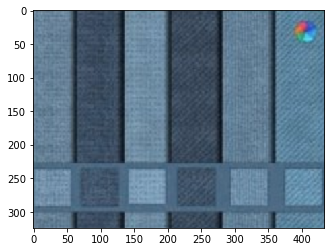

In [25]:
#原图
plt.imshow(img)

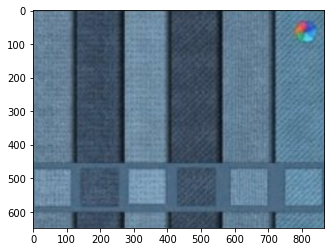

In [26]:
#resize 后的大小
plt.imshow(scaled_img)

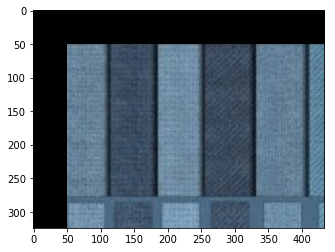

In [35]:
#按一定位置偏移
plt.imshow(translated_img)

## warpPerspective()

## warpPolar()